### Under and Over Sampling, ROC and Precision Recall curve:

In [5]:
# Importing the necessary libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting the dataset: 
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [97]:
# Impoting the libraries:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import classification_report

In [102]:
# Creaing a function for fitting and validating: 
def model(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
    classifier = RandomForestClassifier(n_estimators=350)
    classifier.fit(x_train, y_train)
    # making the prediction:
    y_pred = classifier.predict(x_test)
    y_pred_proba = classifier.predict_proba(x_test)
    # Validating the data: 
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print('Correct Prediction:', np.sum(np.diagonal(cm)))
    print('Incorrect Prediction:', x_test.shape[0] - np.sum(np.diagonal(cm)))
    print('Accuracy:', str((round(accuracy_score(y_test, y_pred),4)*100)))
    print('Precision:', str((round(precision_score(y_test, y_pred),4)*100)))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    # Plotting ROC: 
    # Taking only the positive values:
    y_pred_proba = y_pred_proba[:,1]
    fps, tps, t = roc_curve(y_test, y_pred_proba)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    # Plotting the precision - recall curve: 
    precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
    ps_auc = auc(recall, precision)
    # Plotting the graphs: 
    f, axes = plt.subplots(1,2, figsize = (15,8))
    area = str('AUC :'+ str(auc_roc))
    axes[0].plot(fps, tps, 'tab:orange')
    axes[0].set_title('The ROC Graph')
    axes[0].set(xlabel = '1 - specificity', ylabel = 'sensitivity')
    axes[0].legend([area])
    # The second graph
    area_2 = str('AUC :' + str(ps_auc))
    axes[1].plot(recall, precision, 'tab:green')
    axes[1].set_title('The Precision Recall Graph')
    axes[1].set(xlabel = 'Recall', ylabel = 'Precision')
    axes[1].legend([area_2])
    plt.show()
    print('Area under ROC:', auc_roc)
    print('Area under Precision-Recall:',ps_auc)

#### EDA:

In [3]:
# Shalpe of the dataset: 
df.shape

(284807, 31)

In [8]:
# Values in the output columns: 
np.unique(df.Class.values)

array([0, 1], dtype=int64)

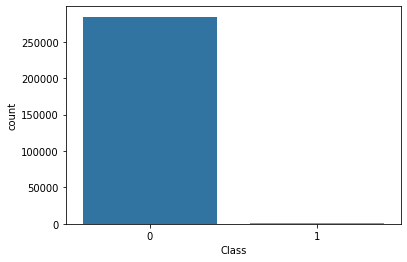

0    284315
1       492
Name: Class, dtype: int64


In [9]:
# Count of each category:
sns.countplot(df.Class)
plt.show()
print(df.Class.value_counts())

#### Prediction without balancing: 

In [106]:
# Defining x and y: 
x = df.drop(columns=['Class'])
y = df.Class.values

In [107]:
# Count of 1's and 0's
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([284315,    492], dtype=int64))

NO SAMPLING APPLIED:

[[56862     2]
 [   21    77]]
Correct Prediction: 56939
Incorrect Prediction: 23
Accuracy: 99.96000000000001
Precision: 97.47
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



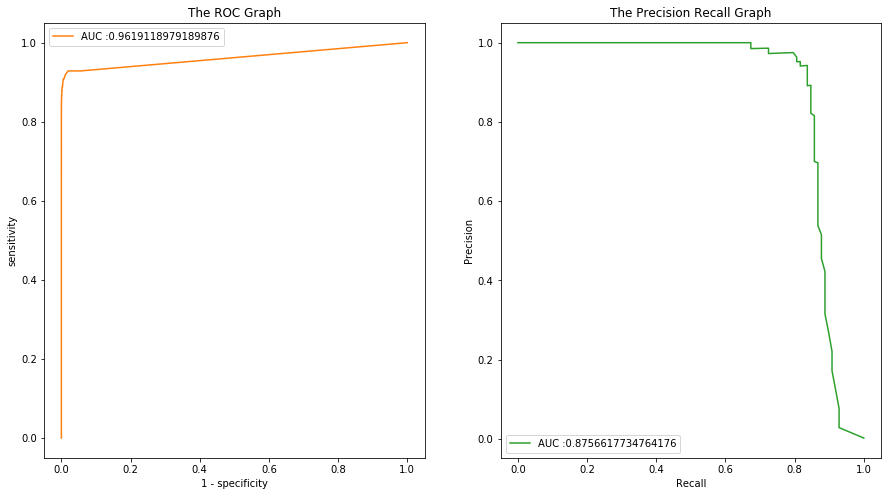

Area under ROC: 0.9619118979189876
Area under Precision-Recall: 0.8756617734764176


In [108]:
# Viewing the model performance: 
print('NO SAMPLING APPLIED:', end = '\n\n')
model(x,y)

#### Balancing the output colums:

##### UnderSampling:

In [10]:
# Balancing calss 0: 
class_0_index = df.loc[df.Class == 0].index

In [11]:
class_0_index.shape

(284315,)

In [12]:
class_1_index = df.loc[df.Class == 1].index

In [13]:
class_1_index.shape

(492,)

In [15]:
undersampled_class_0 = np.random.choice(class_0_index, class_1_index.shape[0], replace = False)

In [16]:
undersampled_class_0.shape

(492,)

In [22]:
undersampled_class_0

array([169971, 206418, 261039, 277460,  99455,  30106, 118606,  54011,
        15578, 243583, 109490,   7921,  78502, 273514, 140220, 138191,
       112802, 184509,  30387, 179899, 151307, 110998, 140826, 280938,
        75347, 150425, 111182, 187292,  33617, 131918, 214660, 216446,
       157763, 255675, 161355, 140251,   2612,  17686,  39715,  98213,
       264774, 148085,  77931, 283860,   4100, 113735,  43211, 154595,
       191637,  83213,  29881,  49953, 116530,  85672, 215478,  84343,
        54344,  32768, 170909, 211415,  87918, 104437, 276458, 222657,
       182723, 188453, 101357, 168535, 261310, 195867, 214497,    742,
        33465, 152026, 262316,  47529, 246602, 273510,   7495, 172033,
        92455, 262155, 190262, 109129,  81542, 274051, 192085,  93999,
       216206, 260138, 183281, 119037,  12759,  74960, 147615,  82605,
       253051, 228777,  15107,  89126,  87748, 174898, 134772,   8554,
       120615,  20852, 208769, 238282, 194135,  70014, 106538,  59174,
      

In [29]:
df_undersampled = pd.concat((df.loc[undersampled_class_0,:],df.loc[class_1_index,:]), axis = 0)

In [30]:
# EDA on the new dataset: 
df_undersampled.shape

(984, 31)

In [31]:
df_undersampled.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

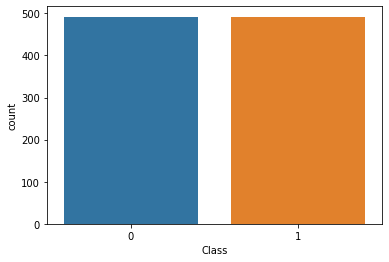

In [33]:
# Value count after undersamping: 
sns.countplot(df_undersampled.Class)
plt.show()

In [45]:
# Developing x and y: 
x = df_undersampled.drop(columns=['Class'])
y = df_undersampled.Class

UNDERSAMPING OUTPUT:

[[96  3]
 [12 86]]
Correct Prediction: 182
Incorrect Prediction: 15
Accuracy: 92.39
Precision: 96.63000000000001
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



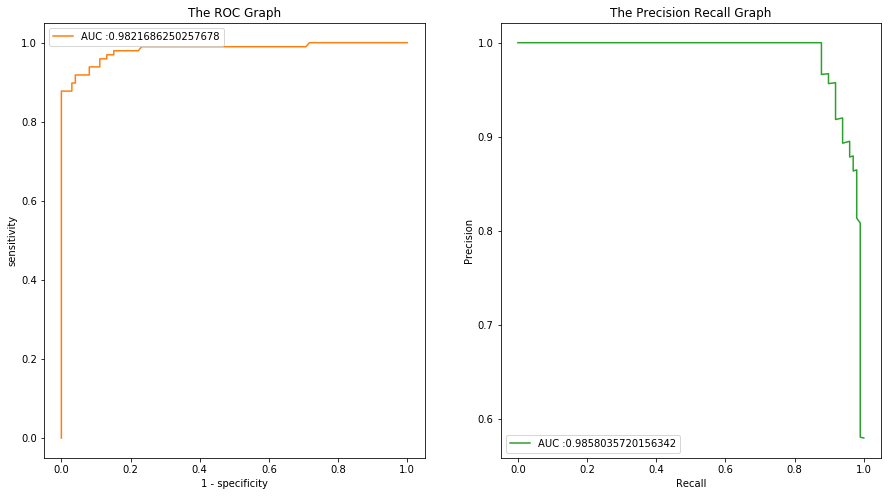

Area under ROC: 0.9821686250257678
Area under Precision-Recall: 0.9858035720156342


In [104]:
# Calling the model function for data prediction and validation: 
print('UNDERSAMPING OUTPUT:', end = '\n\n')
model(x,y)

#### OverSampling:

In [109]:
# Importing the libraries: 
from imblearn.over_sampling import SMOTE

In [110]:
# Defining x and y: 
x = df.drop(columns=['Class'])
y = df.Class.values

In [111]:
# Checking the differenct in 1's and 0's 
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([284315,    492], dtype=int64))

In [112]:
# Performing the over sampling: 
x_oversample, y_oversample = SMOTE().fit_sample(x,y)

In [113]:
# Checking y_oversample now: 
np.unique(y_oversample, return_counts=True)

(array([0, 1], dtype=int64), array([284315, 284315], dtype=int64))

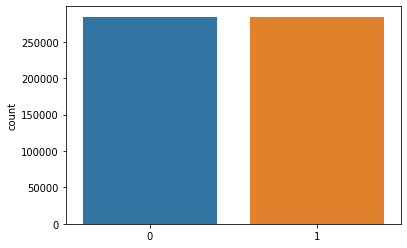

(array([0, 1], dtype=int64), array([284315, 284315], dtype=int64))

In [117]:
# Count plot: 
sns.countplot(y_oversample)
plt.show()
np.unique(y_oversample, return_counts=True)

OVER SAMPLING:
[[56862     2]
 [   22    76]]
Correct Prediction: 56938
Incorrect Prediction: 24
Accuracy: 99.96000000000001
Precision: 97.44
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



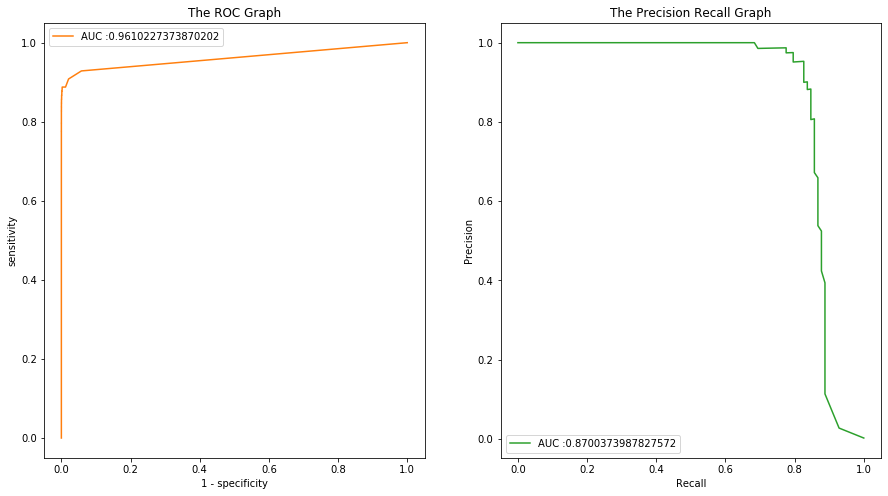

Area under ROC: 0.9610227373870202
Area under Precision-Recall: 0.8700373987827572


In [114]:
# Predicting and analysing:
print('OVER SAMPLING:')
model(x,y)